In [105]:
options(repr.plot.width=2.5, repr.plot.height=4)

In [3]:
data <- get(load("Daten.RData"))

In [4]:
data$Raucherstatus[data$Raucherstatus=="."]<-NA

In [5]:
data <- na.omit(data) 

In [6]:
attach(data)

In [7]:
head(data,10)

PatientenNr Therapie Geschlecht Alter Groesse Gewicht1 Blutdruck
1   1          3        w          51    179      78      195      
2   2          3        m          47    165      76      105      
3   3          1        m          21    169      75      110      
5   5          1        m          65    181      80      125      
6   6          3        m          52    190      79      140      
8   8          1        m          31    190     105      125      
9   9          2        m          53    154      81      135      
10 10          2        m          17    177      78      125      
11 11          3        m          51    182      80      110      
12 12          3        m          14    150      45      105      
   Raucherstatus Gewicht2 Zeit Ereignisindikator
1  ja            74        65  1                
2  ja            66       123  0                
3  nein          68       165  0                
5  nein          82       115  1                
6  ja            89       192  0                
8  nein          89       136  0                
9  nein          55       174  1                
10 nein          67        96  1                
11 ja            80       151  0                
12 ja            58       140  1

### a) Simpson diversity index and entropy

In [8]:
list(Alter/10)

[[1]]
 [1] 5.1 4.7 2.1 6.5 5.2 3.1 5.3 1.7 5.1 1.4 5.2 3.3 5.2 2.1 2.5 2.9 1.3 3.0 3.1
[20] 2.3 2.3 2.4 1.7 5.2 2.1 2.4 0.8 5.9 2.5 2.2 3.7 2.0 5.3 4.3 7.4 5.3 3.3 3.7
[39] 2.2 1.7 2.0 2.8 1.9 5.8 3.1 2.3 4.0 4.0 1.9 6.2 2.8 3.1 1.7 6.9 3.4 2.1 5.6
[58] 2.3 3.7 3.0 1.8 3.6 1.4 1.6 6.6 5.4 5.1 2.1 7.3 3.8 3.4 5.1 4.1 5.4 5.5 5.3
[77] 4.3 3.8 5.3 2.4 5.4 5.1 3.4 3.4 3.4 4.4 5.8 5.1 1.7 2.4 3.7 5.1

In [9]:
list(Alter/10+1) #avoid decade 0

[[1]]
 [1] 6.1 5.7 3.1 7.5 6.2 4.1 6.3 2.7 6.1 2.4 6.2 4.3 6.2 3.1 3.5 3.9 2.3 4.0 4.1
[20] 3.3 3.3 3.4 2.7 6.2 3.1 3.4 1.8 6.9 3.5 3.2 4.7 3.0 6.3 5.3 8.4 6.3 4.3 4.7
[39] 3.2 2.7 3.0 3.8 2.9 6.8 4.1 3.3 5.0 5.0 2.9 7.2 3.8 4.1 2.7 7.9 4.4 3.1 6.6
[58] 3.3 4.7 4.0 2.8 4.6 2.4 2.6 7.6 6.4 6.1 3.1 8.3 4.8 4.4 6.1 5.1 6.4 6.5 6.3
[77] 5.3 4.8 6.3 3.4 6.4 6.1 4.4 4.4 4.4 5.4 6.8 6.1 2.7 3.4 4.7 6.1

In [10]:
dekade_alter <- floor((Alter/10)+1) #remove decimal places
dekade_alter

[1] 6 5 3 7 6 4 6 2 6 2 6 4 6 3 3 3 2 4 4 3 3 3 2 6 3 3 1 6 3 3 4 3 6 5 8 6 4 4
[39] 3 2 3 3 2 6 4 3 5 5 2 7 3 4 2 7 4 3 6 3 4 4 2 4 2 2 7 6 6 3 8 4 4 6 5 6 6 6
[77] 5 4 6 3 6 6 4 4 4 5 6 6 2 3 4 6

In [11]:
table(dekade_alter)

dekade_alter
 1  2  3  4  5  6  7  8 
 1 12 22 20  7 24  4  2 

In [48]:
length(table(dekade_alter))

[1] 8

In [49]:
table(dekade_alter)/length(table(dekade_alter))

dekade_alter
    1     2     3     4     5     6     7     8 
0.125 1.500 2.750 2.500 0.875 3.000 0.500 0.250 

In [53]:
diversity <- function(x){
   J <- length(table(x))                     
   fj <- table(x)/length(x)                  #relative frequency
   simpsons.D <- (1-sum(fj^2)) * J / (J-1)
   entropie <- (-sum(fj*log2(fj)))/log2(J)
   list(Simpsons.D=simpsons.D, Entropie=entropie)
}

In [54]:
diversity(Raucherstatus)

$Simpsons.D
[1] 0.9697543

$Entropie
[1] 0.978071

In [55]:
diversity(dekade_alter)

$Simpsons.D
[1] 0.9168242

$Entropie
[1] 0.8438823

In [71]:
#alternative
sapply(1:1, function(x)  diversity(Raucherstatus))
sapply(1:1, function(x)  diversity(dekade_alter))

[,1]     
Simpsons.D 0.9697543
Entropie   0.978071

[,1]     
Simpsons.D 0.9168242
Entropie   0.8438823

### b) Leti's D

In [77]:
table(Therapie)

Therapie
 1  2  3 
30 29 33 

In [84]:
cumsum(table(Therapie))     #cumulative sum ; also cumsum(x), cumprod(x), cummax(x), cummin(x)

1  2  3 
30 59 92

In [92]:
leti <- function(x){                 
   fj <- table(x)/length(x)                  #relative frequency
   J <- length(table(fj))    
   Fn <- cumsum(fj)
   letis.D <- 4 / (J-1) * sum(Fn*(1-Fn))
   list(letis.D=letis.D)
}

In [95]:
leti(Therapie)

$letis.D
[1] 0.8995747

### c) Scattering measures for quantitative variables

In [99]:
str(Groesse)

 num [1:92] 179 165 169 181 190 190 154 177 182 150 ...


In [100]:
table(Groesse)

Groesse
122 149 150 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 
  1   1   2   1   2   1   1   1   4   3   1   2   4   1   1   2   4   2   3   3 
169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 185 187 189 190 192 
  2   1   2   3   3   3   2   5   6   2   4   1   5   2   1   1   1   2   2   2 
193 200 
  1   1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  122.0   161.0   172.0   170.4   178.2   200.0 

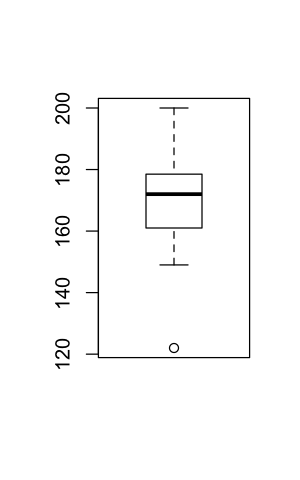

In [106]:
summary(Groesse)   #quick information
boxplot(Groesse)

In [107]:
# MAD/Spannweite/Quartilsdifferenz 

In [111]:
mad(Groesse) #Median Absolute Deviation (mean absolute deviation from median)
diff(range(Groesse)) #difference betweeen min and max value
IQR(Groesse) #Interquartile Range

[1] 11.8608

[1] 78

[1] 17.25

In [112]:
#Varianz/Standardabweichung/Variationskoeffizient

In [114]:
var(Groesse) #variance
sd(Groesse) #standard deviation
sd(Groesse)/mean(Groesse) #Coefficient of variation = sd / mean

[1] 152.5106

[1] 12.34952

[1] 0.07246354